In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import holidays

In [4]:
df = pd.read_csv("../data/processed/hourly_bikes_mannheim.csv", low_memory=False)
df = df.replace(["na", "NA", "Na"], np.nan)

print(df.isna().sum())
df["site_temperature"] = df["site_temperature"].astype(float)
df["site_rain_accumulation"] = df["site_rain_accumulation"].astype(float)
df["site_snow_accumulation"] = df["site_snow_accumulation"].astype(float)


/tmp/ipykernel_4598/1257658190.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(["na", "NA", "Na"], np.nan)


operator_name                  0
domain_name                    0
domain_id                      0
counter_site                   0
counter_site_id                0
counter_serial                 0
longitude                      0
latitude                       0
timezone                       0
iso_timestamp                  0
channels_in                    0
channels_out                   0
channels_unknown          698715
channels_all                   0
site_temperature            8846
site_rain_accumulation      8846
site_snow_accumulation    698715
year                           0
dtype: int64


/tmp/ipykernel_4598/2721099372.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df_ma.groupby('time_of_day')['channels_all'].mean().reset_index()


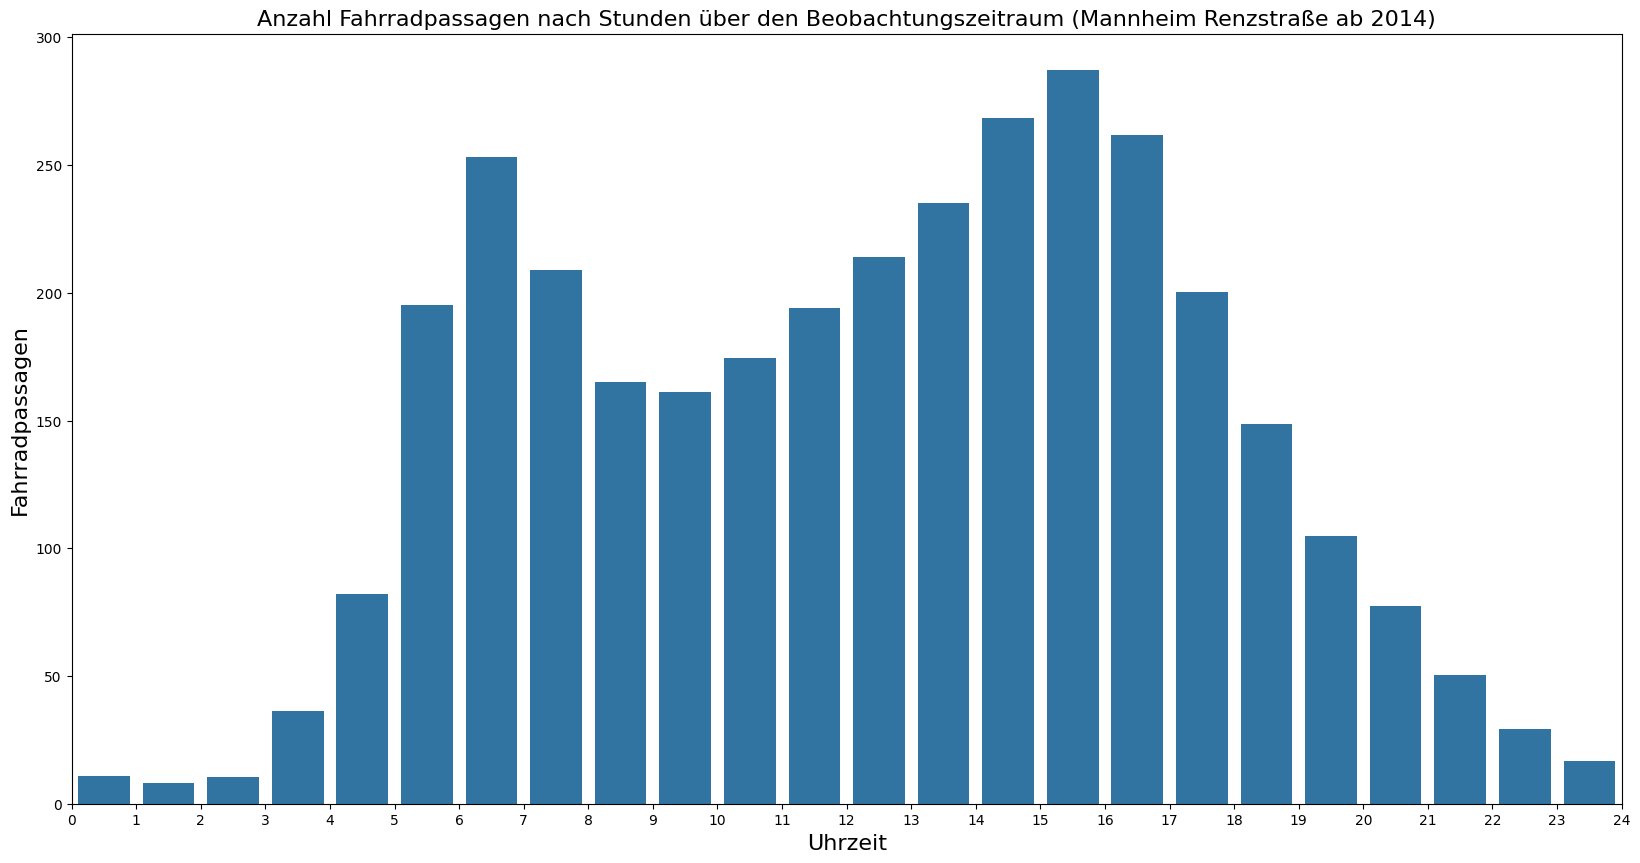

In [ ]:
# Ensure the 'iso_timestamp' is properly parsed with utc=True
df['timestamp'] = pd.to_datetime(df['iso_timestamp'], utc=True)  # Convert to datetime with UTC handling

# Extract the hour from the timestamp
df['hour'] = df['timestamp'].dt.hour

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,17,18,19,20,21,22,23,24]  # These are the edges of your 3-hour bins


# Add a new column with the time bin for each row
df['time_of_day'] = pd.cut(df['hour'], bins=bins, right=False)

# Aggregate the data by time_of_day
#agg_df = df.groupby('time_of_day')['channels_all'].sum().reset_index()

df_ma = df[df['counter_site'] == "Renzstraße"]
agg_df = df_ma.groupby('time_of_day')['channels_all'].mean().reset_index()



# Create a Seaborn bar plot to visualize the aggregated data
plt.figure(figsize=(20, 10))
ax = sns.barplot( data=agg_df,x="time_of_day", y="channels_all")


n = len(agg_df)  # bei dir 24

# Ticks auf die Grenzen legen: -0.5, 0.5, 1.5, ..., 23.5
ax.set_xlim(-0.5, n - 0.5)
ax.set_xticks(np.arange(-0.5, n + 0.5, 1))

# Tick-Labels: 0..24 (Grenzwerte)
ax.set_xticklabels([str(i) for i in range(n + 1)], rotation=0)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)

# Add some labels and title to the plot
ax.set_title('Fahrradpassagen pro Stunde als arithmetisches Mittel über den Beobachtungszeitraum (Mannheim, Renzstraße, ab 2014)', fontsize=16)
plt.xlabel('Uhrzeit', fontsize=16)

from matplotlib.ticker import EngFormatter, FuncFormatter

#ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x/1e6:.1f}"))
plt.ylabel('Fahrradpassagen', fontsize=16)

# Optionally, rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [6]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 1 if weekend, 0 if weekday
# You can manually add holidays or use a library like `holidays` to check if the day is a public holiday.
de_holidays = holidays.Germany(years=2023)  # For Germany, for example
df['is_holiday'] = df['timestamp'].dt.date.isin(de_holidays.keys()).astype(int)
